<img src = 'https://bancariosbh.org.br/manager/resources/uploads/213/350_198_8e66ca00d7dfdfbd00096a7c220be22c.jpg' height="200" width="340">
<p><b><font size = 5 face = 'verdana'> TRABALHO FINAL - PROCESSAMENTO DE LINGUAGEM NATURAL</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de PROCESSAMENTO DE LINGUAGEM NATURAL do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSORA:</b> BARBARA SILVEIRA FRAGA<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>
<hr></hr>
<p><font size = 3 face = 'verdana'>Neste trabalho pretendo descrever uma maneira de coletar dados publicados na rede social Twitter utilizando a linguagem Python e os recursos fornecidos pela própria plataforma. O objetivo é fazer uma análise de sentimentos com esses dados, para identificar as principais ocorrências relacionadas a palavra <b>ELEIÇÃO</b> e <b>NOVO PRESIDENTE</b>, e ou eventos relacionados com a palavra, e principais ocorrências nos <b>ESTADOS DO NOSSO PAÍS.</b> </font></b></p>

<hr>
<b>TÓPICOS ABORDADOS NESSE TRABALHO:</b><br>
<li>ANÁLISE DE SENTIMENTOS DE DADOS COLETADOS DO TWITTER;</li>




In [235]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string
import unidecode
import unicodedata
from unidecode import unidecode
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import urllib.request
import bz2
import gensim
import warnings
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<p><font size = 3 face = 'verdana'>Para esse trabalho, foi necessário a utilização do Knime para extrações dos dados do Twitter, na tentativa de extração que fiz utilizando a biblioteca do Tweepy, não foi suficiente para trazer o número de registros. Nesse caso, com as mesmas credenciais utilizanda no Python, só consegui extrair um total de 20 - 30 registros, no Knime foi possível aumentar esse total de registros para 1.000.</font></b></p>
<hr>
<p><b><font size = 3 face = 'verdana'>Essa foi a configuração utilizada no Knime para extrair os dados do Twitter:</font></b></p>
<hr>

<img src = 'https://raw.githubusercontent.com/oserxavier/Machine-Learning/main/figures/knime_tweets_eleicao.PNG' height="500" width="1000">





In [236]:
# Fiz a autenticação para o Colab efetuar a leitura 
# dos meus arquivos a partir do Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
%%time
# carregando o arquivo na variável path:
path = "/content/drive/MyDrive/PUC Minas/Materias/PROCESSAMENTO DE LINGUAGEM NATURAL/Trabalho Final/dataset_tweets/tweets_eleicao.xlsx"

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs


In [238]:
# Coloquei o dataset dentro da variável e nomeei para tweets_df
# Em seguida faço a impressão das 5 primeiras linhas
tweets_df = pd.read_excel(path)
tweets_df.head()

,Tweet,Tweet ID,Time,Favorited,Retweeted,Is Favourited,Is Retweeted,Is Retweet,Retweet from,Latitude,...,User - Description,User - URL,User - Creation time,User - Language,User - Location,User - Time Zone,User - Statuses,User - Followers,User - Friends,User - Favourites
0,"Disse agora ao presidente do Senado, Rodrigo P...",1.603465e+18,2022-12-15 15:58:44,54520.0,10535.0,False,False,False,NaN,NaN,...,🔸 Cientista político e jornalista\n🔸 Deputado ...,https://t.co/Ceco9fvtYT,2009-02-17 03:27:30,NaN,Dois Irmãos - RS,NaN,19483.0,697832.0,1796.0,1372.0
1,Lula volta a sangrar a Petrobras! A companhia ...,1.603371e+18,2022-12-15 09:45:34,16581.0,3884.0,False,False,False,NaN,NaN,...,🔸 Cientista político e jornalista\n🔸 Deputado ...,https://t.co/Ceco9fvtYT,2009-02-17 03:27:30,NaN,Dois Irmãos - RS,NaN,19483.0,697832.0,1796.0,1372.0
2,"Não quero Bolsonaro como senador vitalício, ne...",1.603443e+18,2022-12-15 14:31:50,23035.0,2320.0,False,False,False,NaN,NaN,...,Escritora/Roteirista - Física/Jornalista - Col...,https://t.co/UxowZS8SvY,2007-04-09 19:02:56,NaN,"São Paulo, Br",NaN,349121.0,689514.0,4556.0,50867.0
3,RT @TerraBrasilnot: Governo Bolsonaro concluiu...,1.603868e+18,2022-12-16 18:41:48,0.0,3393.0,False,False,True,TerraBrasilnot,NaN,...,NaN,NaN,2022-10-30 09:32:55,NaN,NaN,NaN,316.0,6.0,45.0,122.0
4,"RT @LucianoGiusepp4: Não existe mais leis, nem...",1.603868e+18,2022-12-16 18:41:48,0.0,506.0,False,False,True,LucianoGiusepp4,NaN,...,Health Coach,https://t.co/crQXhxcY6H,2014-05-30 10:07:02,NaN,São Paulo - SP,NaN,6920.0,246.0,359.0,6265.0


In [239]:
# Essas são as colunas existentes dentro do dataset 26 no total
tweets_df.columns

Index(['Tweet', 'Tweet ID', 'Time', 'Favorited', 'Retweeted', 'Is Favourited',
       'Is Retweeted', 'Is Retweet', 'Retweet from', 'Latitude', 'Longitude',
       'Country', 'User', 'User - Profile image', 'User - Name', 'User - ID',
       'User - Description', 'User - URL', 'User - Creation time',
       'User - Language', 'User - Location', 'User - Time Zone',
       'User - Statuses', 'User - Followers', 'User - Friends',
       'User - Favourites'],
      dtype='object')

In [240]:
# As colunas que não fazem tanto sentido para a análise fiz a exclusão
tweets_df = tweets_df.drop(['Is Favourited',
                'Is Retweeted',
                'Is Retweet',
                'Retweet from',
                'Latitude',
                'Longitude',
                'Country',
                'User - Profile image',
                'User - URL',
                'User - Creation time',
                'User - Language',
                'User - Time Zone'], axis=1)

In [241]:
# Renomei os nomes das colunas
tweets_df.rename(columns={'Tweet':'tweet', 
                          'Tweet ID':'tweet_ID', 
                          'Time':'time', 
                          'Favorited':'favorited', 
                          'Retweeted':'retweeted', 
                          'User':'user',       
                          'User - Name':'user_name', 
                          'User - ID':'user_id', 
                          'User - Description':'description', 
                          'User - Location':'location',
                          'User - Statuses':'statuses', 
                          'User - Followers':'followers', 
                          'User - Friends':'friends',
                          'User - Favourites':'favourites'}, inplace=True)


In [242]:
# Temos um total de 1.000 linhas e 14 colunas no nosso dataset
tweets_df.shape

(1000, 14)

In [243]:
# Esses são os tweets apresentados no dataset, podemos verificar que existem 
# Muitos caracteres especiais e outros detalhes que precisaremos limpar
tweets_df['tweet'].value_counts().head(10)

RT @AlanLopesRio: URGENTE: a Polícia Federal cumpre nesse momento mais de 100 mandados de prisão, busca e apreensão contra apoiadores do presidente Jair Bolsonaro. A operação foi autorizada por Alexandre de Moraes.                                                                                       31
RT @pedroponciobr: URGENTE: a Polícia Federal cumpre nesse momento mais de 100 mandados de prisão, busca e apreensão contra apoiadores do presidente Jair Bolsonaro. A operação foi autorizada por Alexandre de Moraes.                                                                                      18
RT @brom_elisa: O nome disso querida, é Estelionato Eleitoral.\n\nNão subestime a inteligência dos brasileiros,essa “tragédia anunciada” tem a digital de cada um de vcs.\n\nDeve ser difícil falar que mais uma vez Bolsonaro tinha razão e não mentiu né? https://t.co/mQVesZ2voc                          16
RT @JornalBSM: Corregedor do TSE investigado na Lava Jato e amigo de Lula quer tornar Bo

In [244]:
# Faço a remoção de todos os acentos existentes na coluna tweet
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

tweets_df['tweet'] = tweets_df.apply(lambda x: remove_accents(x['tweet']), axis=1)
tweets_df['tweet'].head(10)

0    Disse agora ao presidente do Senado, Rodrigo P...
1    Lula volta a sangrar a Petrobras! A companhia ...
2    Nao quero Bolsonaro como senador vitalicio, ne...
3    RT @TerraBrasilnot: Governo Bolsonaro concluiu...
4    RT @LucianoGiusepp4: Nao existe mais leis, nem...
5    RT @BernardoMF: 1. Arthur Lira e um aluno apli...
6    RT @juniormelorn_: Futuros comandantes militar...
7    RT @diogomainardi: Lewandowski suspendeu o jul...
8    @77_frota Ainda n entendeu? Isso so prova que ...
9    @Metropoles Fake news... Bolsonaro nao mora ai...
Name: tweet, dtype: object

In [245]:
# Abaixo faço o pré processamento passo a passo para a limpeza dos dados
# Extraindo apenas o texto do Tweet
Tweet_Texts=tweets_df['tweet'].values
 
# Fiz a conversão da coluna de texto como uma única string
Tweets_String=str(Tweet_Texts)
 
# Fiz a conversão do texto para que todas fiquem como minúscula
Tweet_Texts_Cleaned = Tweets_String.lower()
 
# Removendo os nomes de usuário do Twitter da sequência de tweets
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)
 
# Removendo os URLS da string do tweet
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)
  
# Excluindo tudo o que não é caracteres
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)
 
# Excluindo qualquer palavra com menos de 3 caracteres
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)
 
# Removendo espaços extras no texto
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)
 
Tweet_Texts_Cleaned

' disse agora presidente senado rodrigo pacheco durante sessao congresso nacional esta situacao ruptura institucional nao pode perdurar ministro uma corte nao podem seguir atuando fora lei fora constituicao papel congresso por fim arbitrio lula volta sangrar petrobras companhia perdeu bilhoes valor mercado desde eleicao prejuizo pode ser maior percepcao mercado que aumentou risco intervencao direta nas estatais com aprovacao maldita emenda mercadante desastre nao quero bolsonaro como senador vitalicio nem sem salario nnao quero bolsonaro anistiado jamais nbolsonaro tem que ser julgado por todos crimes que cometeu nfim governo bolsonaro concluiu mais obras brasil nao existe mais leis nem constituicao federal existe vontade nos milhoes estamos pedindo socorro quem ira nos libertar ainda confiamos nosso presidente arthur lira aluno aplicado aprendeu com eduardo cunha sufocar oposicao esmagar governo ate arrancar que deseja chefao camara encurralou bolsonaro transformando num arremedo prim

In [246]:
# Fiz a tokenização utilizando o split e obtive um resultado de 149.817 tokens
tokens_split = Tweet_Texts_Cleaned.split(" ")
print(len(Tweet_Texts_Cleaned))
print(tokens_split)

149817
['', 'disse', 'agora', 'presidente', 'senado', 'rodrigo', 'pacheco', 'durante', 'sessao', 'congresso', 'nacional', 'esta', 'situacao', 'ruptura', 'institucional', 'nao', 'pode', 'perdurar', 'ministro', 'uma', 'corte', 'nao', 'podem', 'seguir', 'atuando', 'fora', 'lei', 'fora', 'constituicao', 'papel', 'congresso', 'por', 'fim', 'arbitrio', 'lula', 'volta', 'sangrar', 'petrobras', 'companhia', 'perdeu', 'bilhoes', 'valor', 'mercado', 'desde', 'eleicao', 'prejuizo', 'pode', 'ser', 'maior', 'percepcao', 'mercado', 'que', 'aumentou', 'risco', 'intervencao', 'direta', 'nas', 'estatais', 'com', 'aprovacao', 'maldita', 'emenda', 'mercadante', 'desastre', 'nao', 'quero', 'bolsonaro', 'como', 'senador', 'vitalicio', 'nem', 'sem', 'salario', 'nnao', 'quero', 'bolsonaro', 'anistiado', 'jamais', 'nbolsonaro', 'tem', 'que', 'ser', 'julgado', 'por', 'todos', 'crimes', 'que', 'cometeu', 'nfim', 'governo', 'bolsonaro', 'concluiu', 'mais', 'obras', 'brasil', 'nao', 'existe', 'mais', 'leis', 'nem

In [247]:
# Fiz a tokenização utilizando o word_tokenize e obtive um resultado de 21.466 tokens
# Bem melhor que o resultado utilizando o split
tokens_nltk = nltk.word_tokenize(Tweet_Texts_Cleaned, language='portuguese')
print(len(tokens_nltk))
print(tokens_nltk)

21466
['disse', 'agora', 'presidente', 'senado', 'rodrigo', 'pacheco', 'durante', 'sessao', 'congresso', 'nacional', 'esta', 'situacao', 'ruptura', 'institucional', 'nao', 'pode', 'perdurar', 'ministro', 'uma', 'corte', 'nao', 'podem', 'seguir', 'atuando', 'fora', 'lei', 'fora', 'constituicao', 'papel', 'congresso', 'por', 'fim', 'arbitrio', 'lula', 'volta', 'sangrar', 'petrobras', 'companhia', 'perdeu', 'bilhoes', 'valor', 'mercado', 'desde', 'eleicao', 'prejuizo', 'pode', 'ser', 'maior', 'percepcao', 'mercado', 'que', 'aumentou', 'risco', 'intervencao', 'direta', 'nas', 'estatais', 'com', 'aprovacao', 'maldita', 'emenda', 'mercadante', 'desastre', 'nao', 'quero', 'bolsonaro', 'como', 'senador', 'vitalicio', 'nem', 'sem', 'salario', 'nnao', 'quero', 'bolsonaro', 'anistiado', 'jamais', 'nbolsonaro', 'tem', 'que', 'ser', 'julgado', 'por', 'todos', 'crimes', 'que', 'cometeu', 'nfim', 'governo', 'bolsonaro', 'concluiu', 'mais', 'obras', 'brasil', 'nao', 'existe', 'mais', 'leis', 'nem', 'c

In [248]:
# Calculo a frequencia para cada token de forma a plotar os dados no gráfico
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

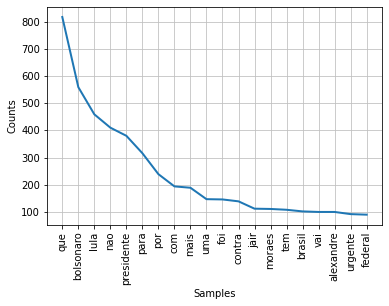

In [249]:
plot_frequencia_tokens(tokens_split)

In [250]:
portugues_stops = stopwords.words('portuguese')
# Fazendo a remoção das stopwords
# Para cada token eu vou imprimir o token
# E se não tiver no portugues_stops
tokens_sem_stop_split = [token for token in tokens_split if token not in portugues_stops]

In [251]:
# Sem o stopwords o número caiu de 149.817 para 17.427 tokens
len(tokens_sem_stop_split)

17427

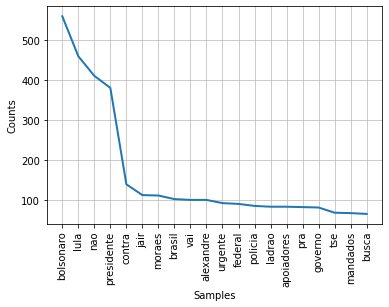

In [252]:
# Plotei o novo gráfico sem as stopwords
plot_frequencia_tokens(tokens_sem_stop_split)

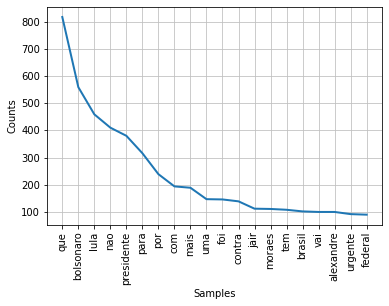

In [266]:
plot_frequencia_tokens(tokens_nltk)

In [269]:
# Sem o stopwords não tivemos diferença pois o total é o mesmo - 21.466
len(tokens_nltk)

21466

In [268]:
# Fazendo a remoção das stopwords
# Para cada token eu vou imprimir o token
# E se não tiver no portugues_stops
tokens_sem_stop_split = [token for token in tokens_nltk if token not in portugues_stops]

In [253]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["uma","porque","todo","quem","fazer"]) #adding our own stopwords

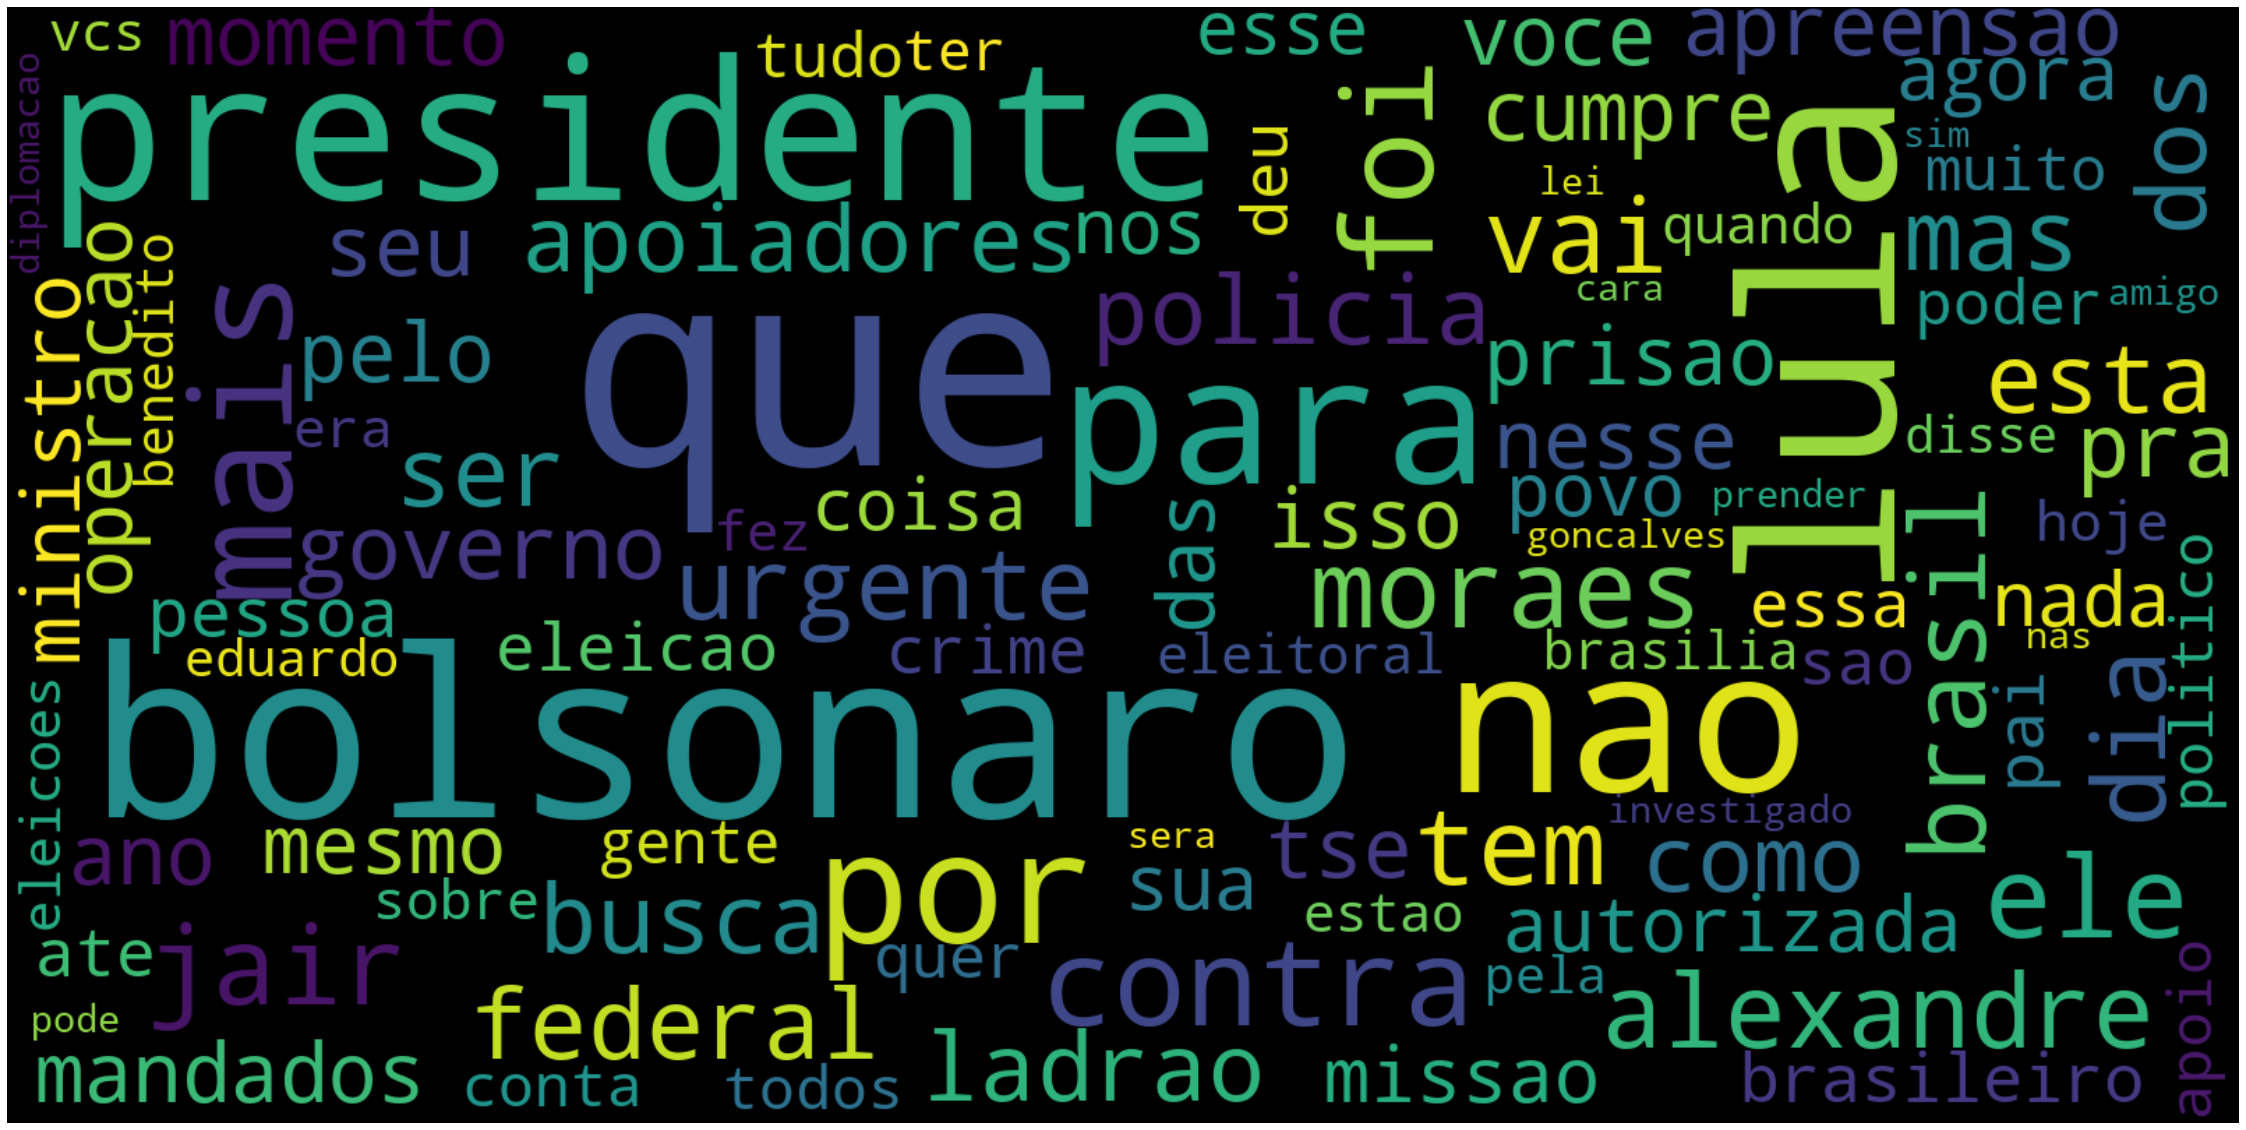

In [264]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=100,collocations=False, background_color='black').generate(Tweet_Texts_Cleaned)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [255]:
def buscafrequencia(palavras):
    palavras = nltk.FreqDist(palavras)
    return palavras
frequencia = buscafrequencia(Tweet_Texts_Cleaned)

In [256]:
def busca_frequencia(palavras):
	palavras = nltk.FreqDist(palavras)
	return palavras

frequencia_treinamento = busca_frequencia(Tweet_Texts_Cleaned)

In [257]:
frequencia_treinamento

FreqDist({' ': 21467, 'a': 17683, 'e': 14038, 'o': 13890, 'r': 10112, 's': 9747, 'i': 9025, 'n': 7467, 't': 5994, 'd': 5470, ...})

# **Top Tweets**

In [258]:
fav_max = np.max(tweets_df['favorited'])
fav = tweets_df[tweets_df.favorited == fav_max].index[0]
print('O perfil mais favoritado é o twitter abaixo:\n\n',tweets_df.iloc[fav])

O perfil mais favoritado é o twitter abaixo:

 tweet          Disse agora ao presidente do Senado, Rodrigo P...
tweet_ID                                   1603464593162244096.0
time                                         2022-12-15 15:58:44
favorited                                                54520.0
retweeted                                                10535.0
user                                             marcelvanhattem
user_name                                      Marcel van Hattem
user_id                                               21069302.0
description    🔸 Cientista político e jornalista\n🔸 Deputado ...
location                                        Dois Irmãos - RS
statuses                                                 19483.0
followers                                               697832.0
friends                                                   1796.0
favourites                                                1372.0
Name: 0, dtype: object


In [259]:
ret_max = np.max(tweets_df['retweeted'])
ret = tweets_df[tweets_df.retweeted == ret_max].index[0]
print('O perfil mais retuitado é o twitter abaixo:\n\n',tweets_df.iloc[ret])

O perfil mais retuitado é o twitter abaixo:

 tweet          RT @LulaOficial: Perdi 3 eleicoes. Nas 3 eu vo...
tweet_ID                                   1603370586415267840.0
time                                         2022-12-15 09:45:11
favorited                                                    0.0
retweeted                                                23381.0
user                                                      DrawJu
user_name                                              Ana Lemos
user_id                                     703682827280392192.0
description                                   Live and let die ✨
location                                                     NaN
statuses                                                   616.0
followers                                                   47.0
friends                                                     83.0
favourites                                                1958.0
Name: 266, dtype: object


In [260]:
friend_max = np.max(tweets_df['friends'])
friend = tweets_df[tweets_df.friends == friend_max].index[0]
print('O perfil com maior número de friends é o twitter abaixo:\n\n',tweets_df.iloc[friend])

O perfil com maior número de friends é o twitter abaixo:

 tweet          RT @edubmGeekNerd: 📺Informe\n\nBolsonaro aprov...
tweet_ID                                   1603867976331059200.0
time                                         2022-12-16 18:41:38
favorited                                                    0.0
retweeted                                                   99.0
user                                                  CravoPaulo
user_name                                            Paulo Cravo
user_id                                             1219673834.0
description    Acredito que esse país tem jeito. Direita e Pa...
location                                   Brasil/Rio de Janeiro
statuses                                                  7986.0
followers                                                44977.0
friends                                                  33509.0
favourites                                               35498.0
Name: 82, dtype: object


In [261]:
tweets_df['user'].value_counts().head(50)

AdolfoVilella      6
bozo_bot           6
varjao_erick       4
Vivianerecife      4
Berola04           4
FabioMo70377730    4
Darth_Revoh        4
Mariade21501765    3
Meg39149387        3
AaliceMesmo        3
Gustavo46159645    3
KirkDou62426256    3
BomfimIran         3
thunder_270380     3
CandiaCrf          3
Distinguished66    3
xisoo94            3
camilallea         3
DenisMacielSoa1    3
RaquelA43433137    3
clfpadilha         3
ZendenDark         3
janasantos61       3
13Danreis          3
BrantesR           2
PatriotaComum      2
mausancler         2
janissecsilva5     2
denisetiafofa      2
9f42dd78e50b4e4    2
mrbarros2014       2
PastorXbox         2
ElsoMeireles5      2
reyjbr2004         2
Alex_Sander_RJ     2
Guilhermew98       2
reginacristinac    2
DrGenivaldo        2
WolfJanAdv         2
marcelvanhattem    2
AnibalTrindade     2
dbenndorf          2
luanrls            2
ALDOBELLELI        2
Magnus33205        2
carlagastal        2
PaulaReginaMar6    2
RaquelM117629

In [262]:
tweets_df['location'].value_counts().head(50)

São Paulo, Brasil              37
Brasil                         37
Rio de Janeiro, Brasil         31
Brasília, Brasil               12
Rio de Janeiro                 11
Porto Alegre, Brasil            9
São Paulo                       6
Santa Catarina, Brasil          5
Belo Horizonte, Brasil          5
Boa Viagem, Recife              4
Fortaleza, Brasil               4
Salvador, Brasil                4
Estados Unidos                  4
Recife, Brasil                  4
Belo Horizonte                  4
Lisboa, Portugal                4
Florida, USA                    4
Santos                          3
São Paulo - Brasil              3
Ribeirão Preto, Brasil          3
Vale do Paraíba - SP            3
Sao Paulo, Brazil               3
Goiânia, Brasil                 3
Guaratinguetá - SP - Brasil     2
Volta Redonda, Brasil           2
Jacarepaguá, Rio de Janeiro     2
Brasília-DF                     2
Campeche, Santa Catarina        2
Planeta Terra                   2
Rio de Janeiro